In [1]:
import sys
from pathlib import Path

sys.path.append(str(Path.cwd().parent / 'src'))

In [2]:
import numpy as np
import torch
import torchvision.transforms.functional as F
from torchvision.ops import box_convert

from data.cctv_dataset import CCTVDataset
from torchvision.transforms import v2 as T

from utils.transform import SquarePad

In [3]:
dataset = CCTVDataset('../datasets/unclean_cctv/')

In [4]:
loader = iter(dataset)

In [5]:
import matplotlib.pyplot as plt

def show(imgs):
    if not isinstance(imgs, list):
        imgs = [imgs]
    fix, axs = plt.subplots(ncols=len(imgs), squeeze=False)
    for i, img in enumerate(imgs):
        img = img.detach()
        img = F.to_pil_image(img)
        axs[0, i].imshow(np.asarray(img))
        axs[0, i].set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])

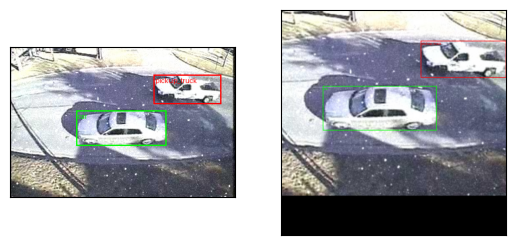

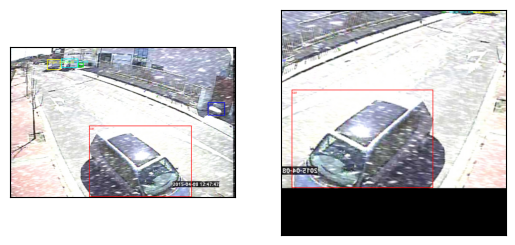

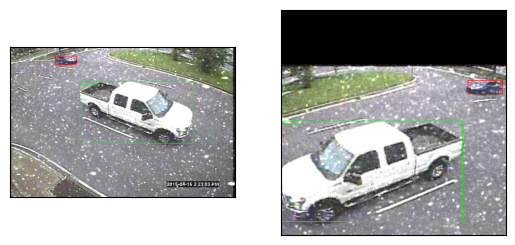

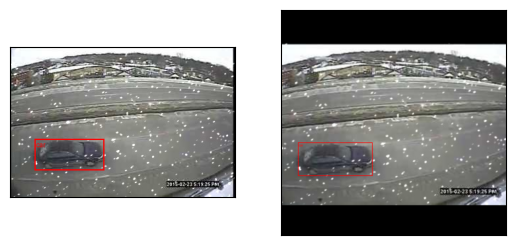

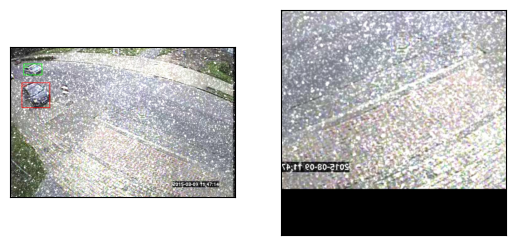

In [11]:
from torchvision.utils import draw_bounding_boxes

colors = [
    (255, 0, 0),
    (0, 255, 0),
    (0, 0, 255),
    (0, 255, 255),
    (255, 255, 0),
    (255, 0, 255),
    (80, 70, 180),
    (250, 80, 190),
    (245, 145, 50),
    (70, 150, 250),
    (50, 190, 190)
]

IMAGE_SIZE = 720

transforms = T.Compose([     
    SquarePad(),      
    T.RandomHorizontalFlip(p=0.5),
    T.RandomResizedCrop(IMAGE_SIZE, (0.2, 1), (1, 1), antialias=True),
])

def get_sample_img(sample):
    img = sample['image']
    boxes = sample['boxes']
    boxes = box_convert(boxes, in_fmt='xywh', out_fmt='xyxy')
    drawn_boxes = draw_bounding_boxes(img, boxes, width=2,
                                      colors=colors[:len(sample['labels'])],
                                      labels=[dataset.get_category(i) for i in sample['labels']])
    return drawn_boxes

for i in range(5):
    sample = next(loader)
    transformed = transforms(sample)

    show([
        get_sample_img(sample),
        get_sample_img(transformed)
    ])
